# USA accidents EDA


This notebook and analsys is inpired from the works of @yuvrajdhepe and
Data Source : Kaggle, Information about accidents

Use : can be useful to prevent accidents


## Initialization & Download data

1.Load the file using Pandas

2.look at some information about the data & the data the column

In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [3]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly
import plotly.offline as iplot
import plotly.express as px


In [4]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
len(data.columns)

46

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


Most of the accidents seems a point accidents, due to lower number of end latitude and end time values

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdata = data.select_dtypes(include=numerics)
len(numdata.columns)

13

# Data Preparation and cleaning

- Check missing or incorrect values

Missing values and thier percentage

In [10]:
Miss_data_perc = (100* data.isna().sum().sort_values(ascending = False)/len(data))
Miss_data_perc[Miss_data_perc != 0]

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

In [11]:
Miss_data_perc[Miss_data_perc > 25]

End_Lat              44.029355
End_Lng              44.029355
Precipitation(in)    28.512858
Wind_Chill(F)        25.865904
dtype: float64

removing data where there are more thn 25% of missing data, and country column, for further analysis

In [12]:
#cleaning data
dataC = data[[col for col in data.columns if col not in ['End_Lat','End_Lng', 'Precipitation(in)', 'Wind_Chill(F)', 'Country']]]

Check if all the states are mentioned

In [13]:
info_states = dataC.State.unique()
len(dataC.State.unique())

49

In [14]:
#list of all states in (source:https://snipplr.com/view/50728/list-of-us-state-abbreviations)
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
len(states)

51

In [15]:
no_info_states =[]
for i in states:
    if i not in info_states:
        no_info_states.append(i)
print(no_info_states)   

['AK', 'HI']


The used data do not have an information from Alaska and Hawaii

# Exploratory analysis and visulazation

cloumns to analyse:

1.City

2.Weekly, yearly, daily

3.Location, aka ; Start lat, start lng

4.Temprature

5.Weather Condition

### City wise EDA


In [16]:
cites = dataC.City.unique()
len(cites)

13679

<Axes: >

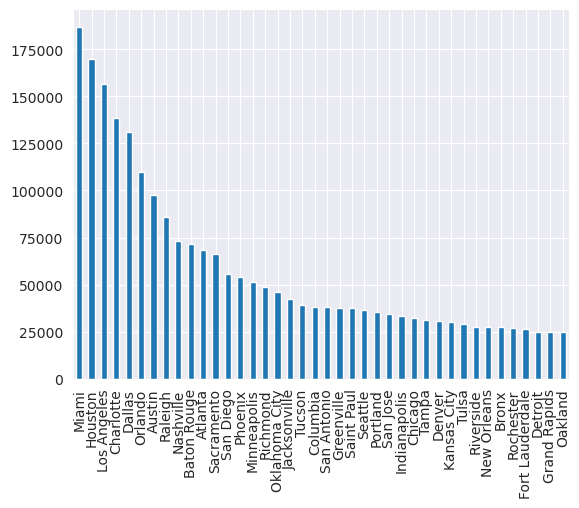

In [17]:
CITYwrtACi = dataC["City"].value_counts()
CITYwrtACi[:40].plot(kind='bar')

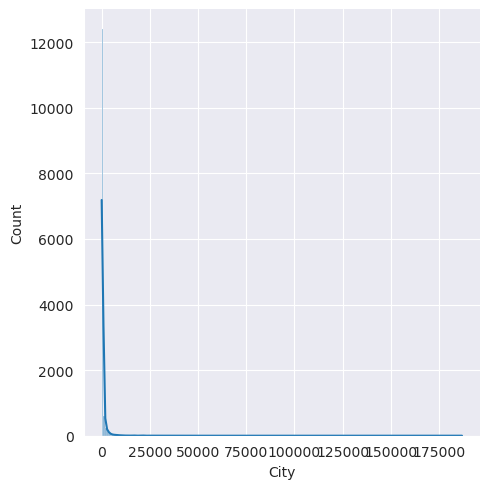

In [18]:
sns.displot(CITYwrtACi, kde = True, bins = 200)

observation: large gap in data: dividing the data in to sections

<Axes: xlabel='City', ylabel='Count'>

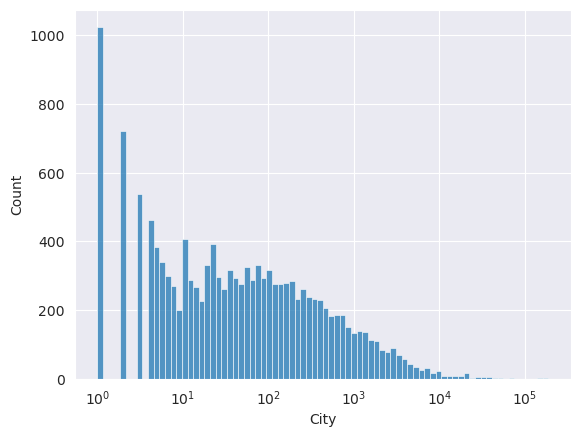

In [19]:
sns.histplot(CITYwrtACi,log_scale = True, bins = 80)

Most of the cityes have accidents ranging from around 1 to 100

In [20]:
CITYwrtACi[CITYwrtACi == 1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

Aleast 1000 cities has reported 1 accident

In [21]:
CITYwrtACi[CITYwrtACi< 10]

Yermo                           9
Washington Crossing             9
Falfurrias                      9
Lookout Mountain                9
Clemons                         9
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 4238, dtype: int64

we have almost 4250 cities with less than 10 accidents  

In [22]:
high_acci_city = CITYwrtACi[CITYwrtACi>1000]
low_acci_city = CITYwrtACi[CITYwrtACi<=1000]
print("low accident city % :",(len(low_acci_city)/len(CITYwrtACi))*100)
print("High accident city % :",(len(high_acci_city)/len(CITYwrtACi))*100)

low accident city % : 91.11712238631378
High accident city % : 8.882877613686212


In [23]:
CITYwrtACi.describe()

count     13678.000000
mean        565.005191
std        4147.357347
min           1.000000
25%           6.000000
50%          35.000000
75%         201.000000
max      186917.000000
Name: City, dtype: float64

## Weekly, yearly, daily (Start time)

In [24]:
type(dataC.Start_Time[0])

str

In [25]:
dataC.Start_Time.head()

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object

In [26]:
dataC.Start_Time = pd.to_datetime(dataC.Start_Time)

/tmp/ipykernel_20/4029030029.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
type(dataC.Start_Time[0])

pandas._libs.tslibs.timestamps.Timestamp

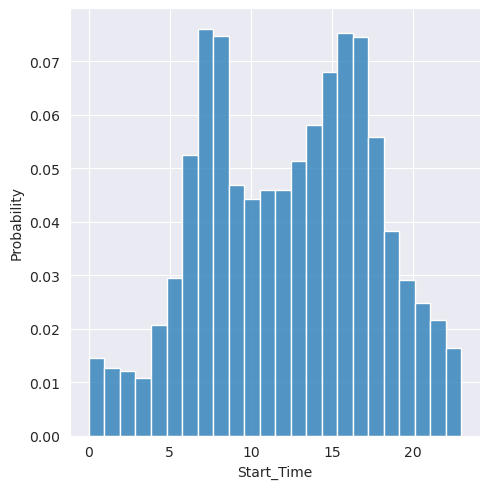

In [28]:
sns.displot(dataC.Start_Time.dt.hour, bins = 24, stat='probability')

there is a peak in values in betwee, 7:00 hours to 9:00 hours, and another spike between 15:00 hours to 18:00 hours

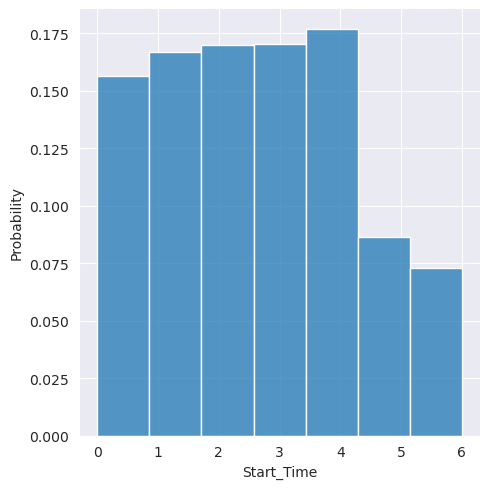

In [29]:
sns.displot(dataC.Start_Time.dt.dayofweek,bins=7, stat='probability')

On weekeds number of accidents is lower
id the disribution of accidents by hour the same on the weekend as on weekdays

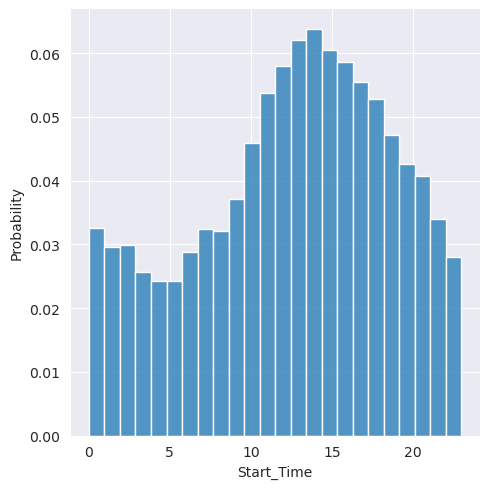

In [30]:
Saturday_ST = dataC.Start_Time[dataC.Start_Time.dt.dayofweek == 6]
sns.displot(Saturday_ST.dt.hour, bins = 24, stat='probability')

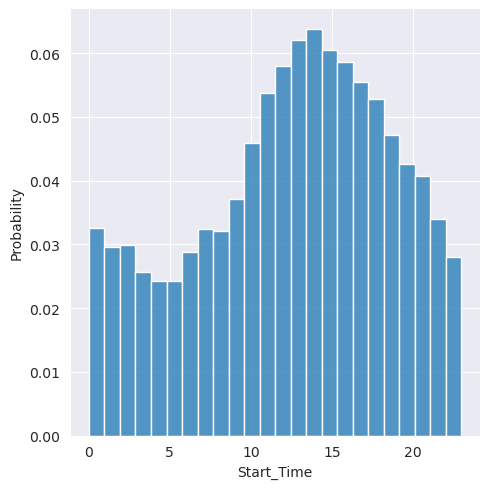

In [31]:
Sunday_ST = dataC.Start_Time[dataC.Start_Time.dt.dayofweek == 6]
sns.displot(Sunday_ST.dt.hour, bins = 24, stat='probability')

Sunday and saturday shows almost same type of disribution, peak number of accidents in the afternoon hours and more later i n the evening compared to morning, maybe because people generally wake up late during moring and return late at night

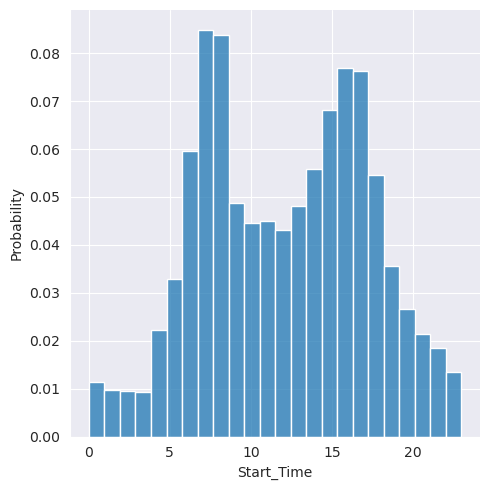

In [32]:
Monday_ST = dataC.Start_Time[dataC.Start_Time.dt.dayofweek == 0]
sns.displot(Monday_ST.dt.hour, bins = 24, stat='probability')

Moday Has almost the same graph of the average daily distribution

<Axes: xlabel='Start_Time', ylabel='Count'>

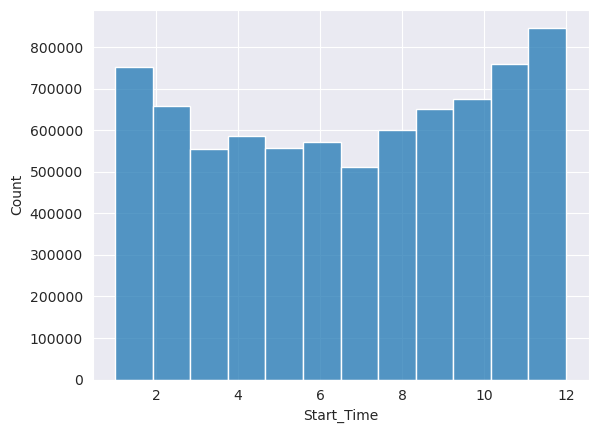

In [33]:
sns.histplot(dataC.Start_Time.dt.month, bins = 12)

we can see some peak during winter months, might be due to lower visibility and slippery roads compared to summer time

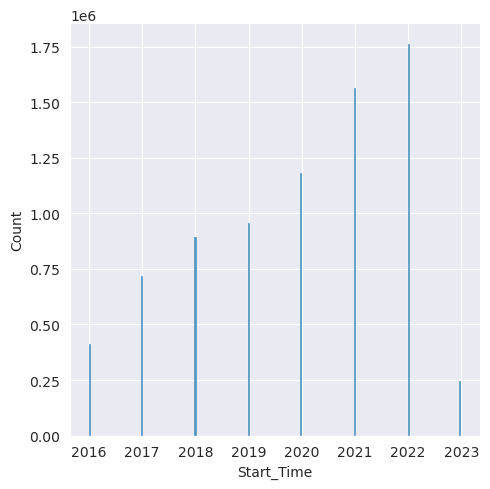

In [34]:
sns.displot(dataC.Start_Time.dt.year)

we cannot relay on data of 2023, because currenty it is 2023. There is steady increse in accidents thoughout the years, even during the 2020, 2021 pandamic period, maybe due to lower relability on public transports and incresed car or individula vehicle useage. Might also be due to lower collection of data in previours years

## Source

In [35]:
dataC['Source']

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

<Axes: ylabel='Source'>

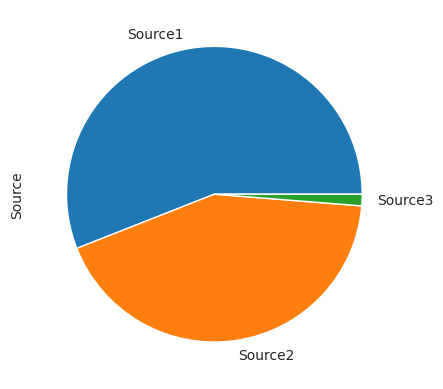

In [36]:
dataC.Source.value_counts().plot(kind='pie')

The sources are not named here, from the discussion section of the dataset it seems like the sources are mainly from Bing and MapQuest

## States in States

In [37]:
dataC.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [38]:
state_accidents = dataC['State'].value_counts()
state_accidents = pd.DataFrame({'State': state_accidents.index, 'Accidents': state_accidents.values})

In [39]:
Count_Accl_Sta = pd.DataFrame(dataC['State'].value_counts())
z = Count_Accl_Sta.values.flatten()
x = Count_Accl_Sta.index.to_list()
fig = go.Figure(data = go.Choropleth(locations = x, z = z, locationmode = "USA-states", colorscale = 'plasma'))

fig.update_layout(title_text = "Number of Accidents for each State in US", geo_scope = "usa")
fig.show()

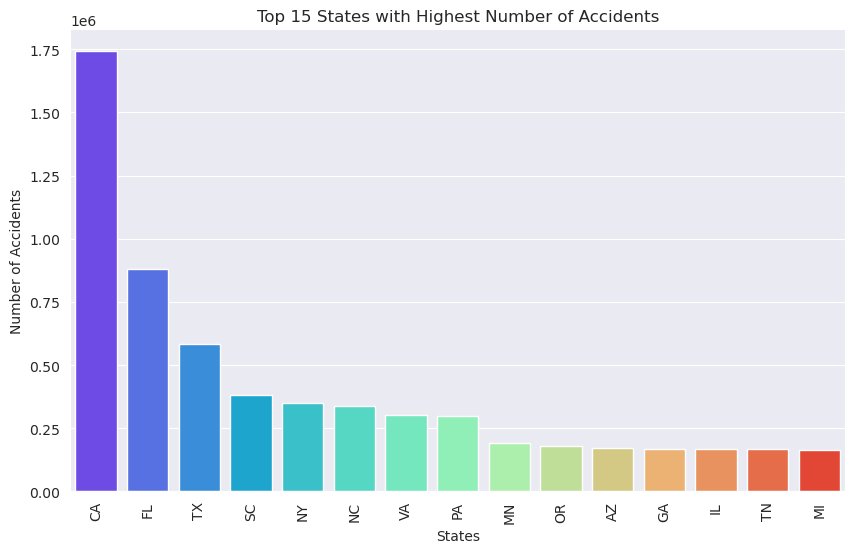

In [40]:
fig,axs = plt.subplots(figsize = (10,6))

x = Count_Accl_Sta[0:15].index.to_list()
y = Count_Accl_Sta[0:15].values.flatten()

sns.barplot(x=x, y = y, palette='rainbow')
axs.tick_params(axis = 'x', rotation = 90)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("Top 15 States with Highest Number of Accidents")
plt.savefig("Top_15_States_Accidents.png",bbox_inches = 'tight', dpi = 300)
plt.show()

In [41]:
city_acc_counts = pd.DataFrame(dataC['City'].value_counts()).reset_index()
city_acc_counts.columns = ['City',"Number of Accidents"]
city_acc_counts.sort_values(by = 'Number of Accidents', ascending = False,inplace = True)
x = city_acc_counts['City'][:15].to_list()
y = city_acc_counts["Number of Accidents"][:15]

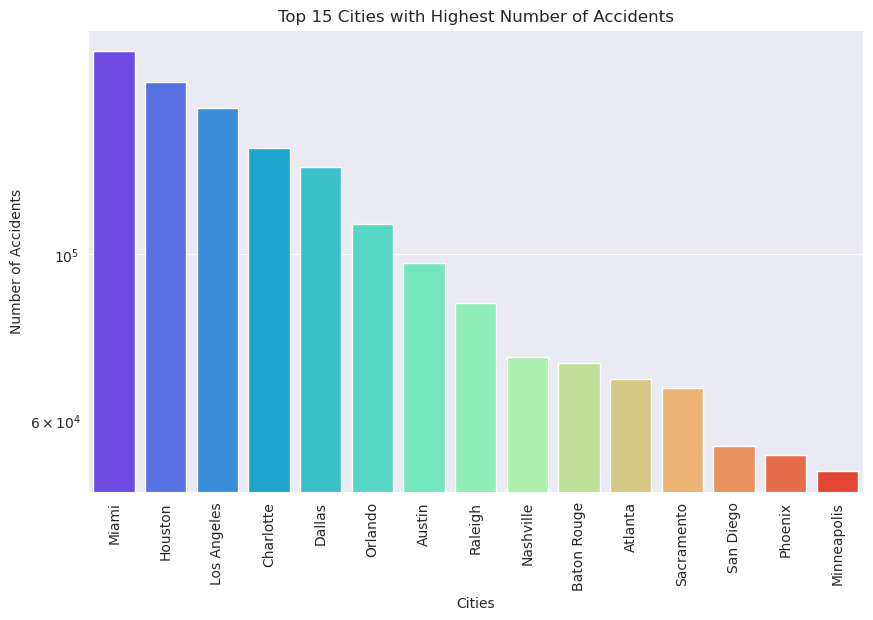

In [42]:
fig,axs = plt.subplots(figsize = (10,6))
sns.barplot(x = x,y=y, ax = axs, palette = 'rainbow')
axs.tick_params(axis = 'x', rotation = 90)
axs.set_yscale("log")
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 15 Cities with Highest Number of Accidents")
plt.savefig("Top_15_Cities_Accidents.png",bbox_inches = 'tight', dpi = 300)
plt.show()

 ## Temprature

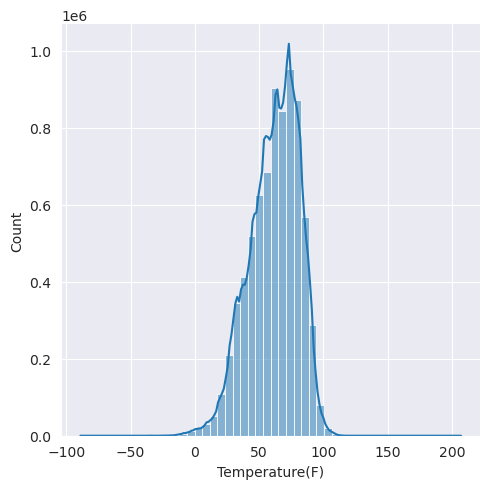

In [43]:
sns.displot(dataC['Temperature(F)'],bins = 50,kde= True)

In [44]:
dataC['Temperature(F)'].mean()

61.66328580941001

In [45]:
dataC['Temperature(F)'].value_counts().head(1) # or mode

77.0    170991
Name: Temperature(F), dtype: int64

Most of the accidents happen when the teprqature was round 77°F that is 25°C, which does not tally with the information most of the accident data is belong winter months, and might be due to the fact 25°C is usuallay taken as environment temprature or room temprature by defalut

## Weather

In [46]:
Top_accI_wea = dataC["Weather_Condition"].value_counts()[:25]
Top_accI_wea

Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Thunder                      14202
Light Rain with Thunder      13597
Smoke                        12668
Wintry Mix                   11703
Partly Cloudy / Windy        10241
Name: Weather_Condition, dtype: int64

<Axes: >

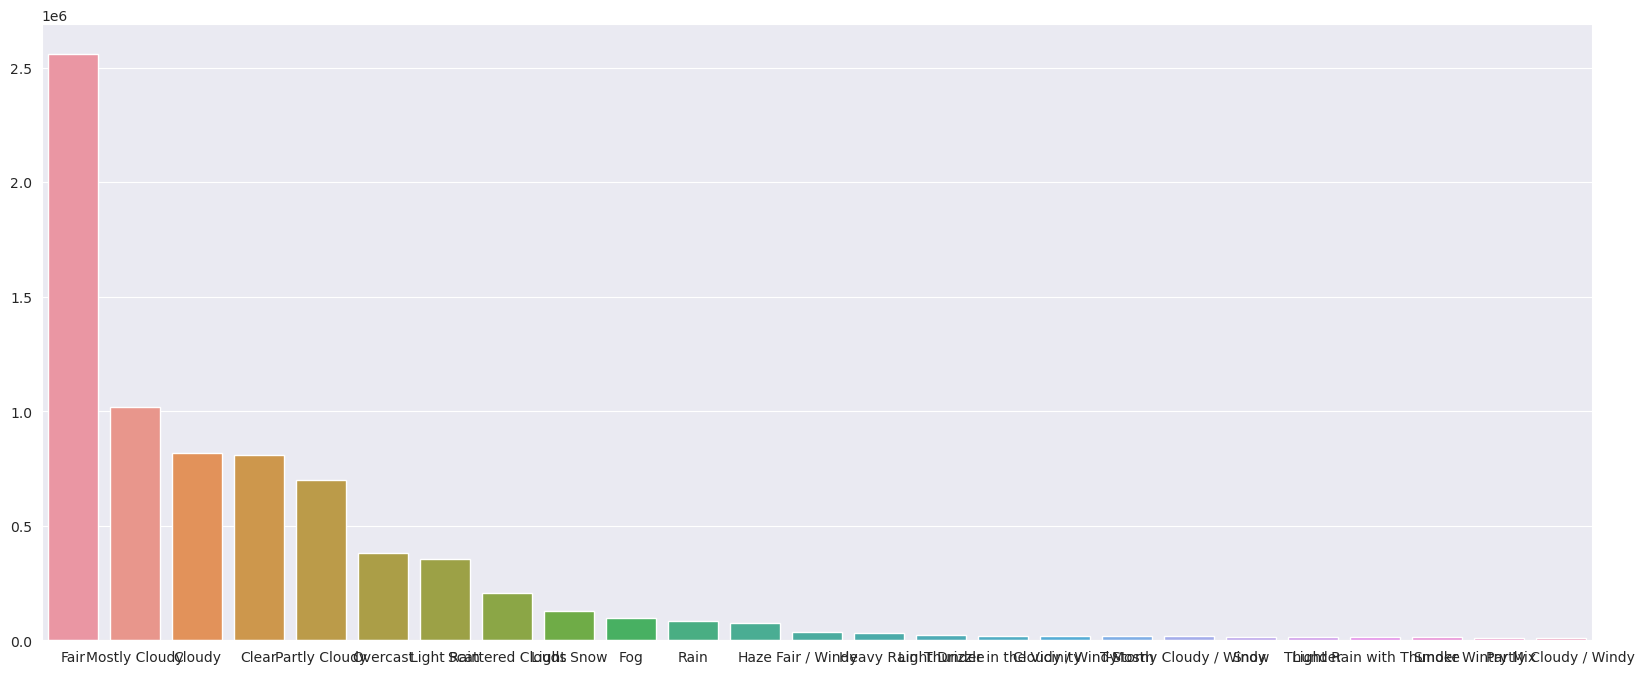

In [47]:
plt.figure(figsize=(20, 8))
sns.barplot(x = Top_accI_wea.index, y=Top_accI_wea.values )

In [48]:
dataC["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

even though most of the accidents are shown for a "Fine day", many rows assosiated with rain, windy,snow

In [49]:
rain_related = ['Light Rain', 'Rain', 'Heavy Rain', 'Light Rain Showers', 'Rain Showers', 'Heavy Rain Showers', 'Heavy Rain / Windy', 'Thunderstorms and Rain', 'Thunderstorm', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunder', 'T-Storm / Windy', 'Thunder / Windy', 'Thunder and Hail', 'Thunder and Hail / Windy']

cloud_related = ['Overcast', 'Mostly Cloudy', 'Cloudy', 'Scattered Clouds', 'Partly Cloudy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 'Cloudy / Windy','Wintry Mix / Windy', 'Sleet', 'Light Sleet', 'Sleet / Windy', 'Heavy Sleet', 'Heavy Sleet / Windy']

snow_related = ['Light Snow', 'Snow', 'Light Snow Shower', 'Snow Showers', 'Heavy Snow', 'Heavy Snow / Windy', 'Light Snow / Windy', 'Snow / Windy', 'Snow and Sleet', 'Snow and Sleet / Windy', 'Heavy Thunderstorms and Snow']

clear = ['Clear', 'Fair', 'Fair / Windy']

drizzle_fog_related = ['Light Drizzle', 'Drizzle', 'Light Freezing Drizzle', 'Heavy Drizzle', 'Drizzle and Fog', 'Mist', 'Fog', 'Shallow Fog', 'Fog / Windy', 'Shallow Fog / Windy', 'Drizzle / Windy', 'Light Drizzle / Windy', 'Light Freezing Rain', 'Freezing Drizzle', 'Light Freezing Rain / Windy', 'Freezing Rain', 'Heavy Freezing Drizzle', 'Heavy Freezing Rain', 'Freezing Rain / Windy', 'Heavy Freezing Rain / Windy']

haze_smoke_related = ['Haze', 'Smoke', 'Light Haze', 'Smoke / Windy', 'Haze / Windy','Sand', 'Blowing Sand', 'Sand / Dust Whirlwinds', 'Sand / Dust Whirlwinds / Windy', 'Duststorm', 'Dust Whirls', 'Blowing Dust', 'Blowing Dust / Windy', 'Widespread Dust', 'Widespread Dust / Windy', 'Squalls / Windy', 'Dust Whirls Nearby', 'Blowing Snow', 'Blowing Snow / Windy', 'Blowing Snow Nearby']

other = ['Light Freezing Fog', 'Light Ice Pellets', 'Ice Pellets', 'Small Hail', 'Wintry Mix', 'Squalls', 'Drifting Snow', 'Low Drifting Snow', 'Drifting Snow']

In [50]:
def map_weather_condition(condition):
    if condition in rain_related:
        return 'Rain_related'
    elif condition in cloud_related:
        return 'Cloudy'
    elif condition in snow_related:
        return 'Snow_related'
    elif condition in clear:
        return 'Clear'
    elif condition in drizzle_fog_related:
        return 'Drizzle_Fog_related'
    elif condition in haze_smoke_related:
        return 'Haze_Smoke_related'
    else:
        return 'Other'

# Apply the mapping function to create the new column
dataC['Weather_Category'] = dataC['Weather_Condition'].map(map_weather_condition)
dataC.head(1)

/tmp/ipykernel_20/3622947396.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Category
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,Night,Night,Night,Night,Rain_related


In [51]:
category_counts = dataC['Weather_Category'].value_counts()
category_percents = category_counts/len(dataC)*100
fig = px.pie(category_percents, names = category_percents.index, values = category_percents.values, title = "Weather Category Percentage") 
fig.show()

Most of the accidents happen during a relativly Clear day and second most on cloudy days.

## Severity

In [52]:
dataC["Severity"].unique()

array([3, 2, 1, 4])

There are 4 level of Severity , with 1 for lowest impact and 4 for highest

In [53]:
#fig = px.violin(dataC, x=dataC.Start_Time.dt.month, y='Severity', 
               # points="all", box=True, hover_data=['Severity'],
              #  labels={'x': 'Month', 'y': 'Severity'})

#fig.show()

In [54]:
#fig = px.box(dataC, x=dataC.Start_Time.dt.dayofweek, y='Severity',
#             labels={'x': 'Week', 'y': 'Severity'})

#fig.show()

# FAQ

1. Are there more accidents in warmer or colder weather
2. which are the 5 states that have number of accidents? and per capita
3. Top 100 cities where accidents happen, and which state they belong to
4. At what time of the day does accidents happens the most?
5. Which day of the week does accidents happens the most?
7. which moths have most of the accidents
8. what is the trend of accidents yeay over year

# Summay and conclusion

Insights
- No data from Alaska and Hawai
- The number of accidents per city show exponental trend
- Less than 9% of cities have accidents more than 1000
- Almost 4250 cities with less than 10 accidents 
- High peercentage of accidents occure between 7am-9am and 3-5 pm ( work starting and ending time)